In [34]:
import pandas as pd
table = pd.read_csv("../0-Data/recipeData.csv",  encoding="latin-1")
pd.set_option("display.max_columns", len(table.columns))
table.head()


,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [35]:
drop = ["BeerID", "Name", "URL", "Style", "UserId"]
table.drop(drop, axis=1, inplace=True)
table.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
0,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
1,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
4,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [36]:
styles = table["StyleID"].value_counts()
above = styles.loc[styles > 1000]
above


7      11940
10      7581
134     2617
9       2277
4       2038
30      1753
86      1478
12      1268
92      1204
6       1152
175     1072
39      1044
Name: StyleID, dtype: int64

In [37]:
table = table.loc[table["StyleID"].isin(above.index)]


In [38]:
table.dtypes


StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
PrimingMethod     object
PrimingAmount     object
dtype: object

In [39]:
sugar_encode = pd.get_dummies(table["SugarScale"], dtype=float)
sugar_encode.head()


,Plato,Specific Gravity
2,0.0,1.0
3,0.0,1.0
5,0.0,1.0
6,0.0,1.0
9,0.0,1.0


In [40]:
brew_encode = pd.get_dummies(table["BrewMethod"], dtype=float)
brew_encode.head()


,All Grain,BIAB,Partial Mash,extract
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


In [41]:
concatenated = pd.concat([table, sugar_encode, brew_encode], axis=1)
concatenated.drop("SugarScale", axis=1, inplace=True)
concatenated.drop("BrewMethod", axis=1, inplace=True)
pd.set_option("display.max_columns", len(concatenated.columns))
table = concatenated
table.head()


,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,Plato,Specific Gravity,All Grain,BIAB,Partial Mash,extract
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,1.0,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,NaN,NaN,21.11,Corn Sugar,4.6 oz / .66 C,0.0,1.0,1.0,0.0,0.0,0.0


In [42]:
table.dtypes


StyleID               int64
Size(L)             float64
OG                  float64
FG                  float64
ABV                 float64
IBU                 float64
Color               float64
BoilSize            float64
BoilTime              int64
BoilGravity         float64
Efficiency          float64
MashThickness       float64
PitchRate           float64
PrimaryTemp         float64
PrimingMethod        object
PrimingAmount        object
Plato               float64
Specific Gravity    float64
All Grain           float64
BIAB                float64
Partial Mash        float64
extract             float64
dtype: object

In [43]:
table.isnull().sum()/len(table)*100


StyleID              0.000000
Size(L)              0.000000
OG                   0.000000
FG                   0.000000
ABV                  0.000000
IBU                  0.000000
Color                0.000000
BoilSize             0.000000
BoilTime             0.000000
BoilGravity          3.669828
Efficiency           0.000000
MashThickness       40.918586
PitchRate           55.185750
PrimaryTemp         31.800474
PrimingMethod       91.841689
PrimingAmount       94.198848
Plato                0.000000
Specific Gravity     0.000000
All Grain            0.000000
BIAB                 0.000000
Partial Mash         0.000000
extract              0.000000
dtype: float64

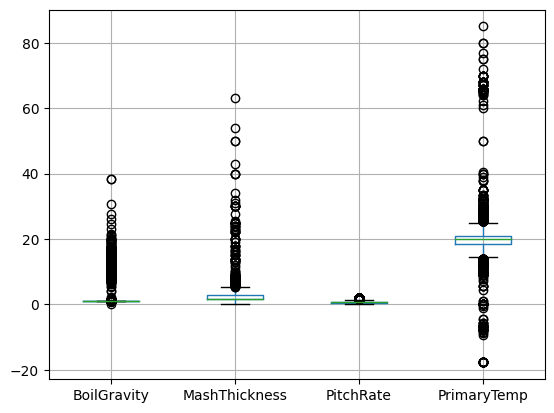

In [44]:
import matplotlib.pyplot as plt
table.boxplot(column = ["BoilGravity","MashThickness","PitchRate","PrimaryTemp"])
plt.show()

In [45]:
drop = ["PrimingMethod", "PrimingAmount"]
table.drop(drop, axis=1, inplace=True)

fill = {"BoilGravity": table["BoilGravity"].median(), "MashThickness": table["MashThickness"].median(
), "PitchRate": table["PitchRate"].mean(), "PrimaryTemp": table["PrimaryTemp"].median()}
table = table.fillna(value=fill)


In [46]:
table.isnull().sum()/len(table)*100


StyleID             0.0
Size(L)             0.0
OG                  0.0
FG                  0.0
ABV                 0.0
IBU                 0.0
Color               0.0
BoilSize            0.0
BoilTime            0.0
BoilGravity         0.0
Efficiency          0.0
MashThickness       0.0
PitchRate           0.0
PrimaryTemp         0.0
Plato               0.0
Specific Gravity    0.0
All Grain           0.0
BIAB                0.0
Partial Mash        0.0
extract             0.0
dtype: float64

In [47]:
table.head()


,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,Plato,Specific Gravity,All Grain,BIAB,Partial Mash,extract
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,1.5,0.677102,20.00,0.0,1.0,0.0,0.0,0.0,1.0
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,1.5,0.677102,20.00,0.0,1.0,1.0,0.0,0.0,0.0
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,1.5,1.000000,20.00,0.0,1.0,1.0,0.0,0.0,0.0
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,1.047,75.0,1.5,0.677102,20.00,0.0,1.0,1.0,0.0,0.0,0.0
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,1.5,0.677102,21.11,0.0,1.0,1.0,0.0,0.0,0.0


In [48]:
table.dtypes


StyleID               int64
Size(L)             float64
OG                  float64
FG                  float64
ABV                 float64
IBU                 float64
Color               float64
BoilSize            float64
BoilTime              int64
BoilGravity         float64
Efficiency          float64
MashThickness       float64
PitchRate           float64
PrimaryTemp         float64
Plato               float64
Specific Gravity    float64
All Grain           float64
BIAB                float64
Partial Mash        float64
extract             float64
dtype: object

In [49]:
x = table.drop("StyleID", axis=1)
y = table["StyleID"]


In [50]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
x_norm = normalizer.fit_transform(x)


In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

algorithm = SelectKBest(score_func=f_classif, k=8)
best_x = algorithm.fit_transform(x_norm,y)
print("Scores:", algorithm.scores_)

Scores: [8.64455876e+00 2.32440876e+00 3.24203196e+00 8.78164747e+02
 1.09802589e+03 4.40330728e+03 7.82073299e+00 9.63362140e+01
 2.31350699e+00 1.13446277e+01 1.20894100e+01 4.90261717e+01
 1.15172650e+02 1.29565432e+00 1.29565432e+00 3.26833278e+00
 8.47794853e+00 2.36197425e+00 1.00392109e+01]


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=10)

logistic_model = LogisticRegression(solver = "saga", n_jobs=-1)
knn_model = KNeighborsClassifier(n_jobs=-1)
gaussian_model = GaussianNB()
dtc_model = DecisionTreeClassifier()

logistic_result = cross_val_score(logistic_model, best_x, y, cv=skfold, n_jobs=-1)
knn_result = cross_val_score(knn_model, best_x, y, cv=skfold, n_jobs=-1)
gaussian_result = cross_val_score(gaussian_model, best_x, y, cv=skfold, n_jobs=-1)
dtc_result = cross_val_score(dtc_model, best_x, y, cv=skfold, n_jobs=-1)

results = {"LogisticRegression":logistic_result.mean(), "KNN":knn_result.mean(), "NaiveBayes":gaussian_result.mean(), "DecisionTreeClassifier":dtc_result.mean()}
results

{'LogisticRegression': 0.43724601185117323,
 'KNN': 0.5044881286662386,
 'NaiveBayes': 0.48913113601660524,
 'DecisionTreeClassifier': 0.4719675574091508}

In [53]:
import numpy as np
from sklearn.model_selection import GridSearchCV

Kvalues = np.array([5,10,25,30,35,40,50])
distanceCal = ["minkowski", "chebyshev"]
Pvalues = np.array([1, 2, 3])
grid_values = {"n_neighbors": Kvalues, "metric": distanceCal, "p": Pvalues}

model = KNeighborsClassifier(n_jobs=-1)

gridKNN = GridSearchCV(estimator=model, param_grid=grid_values, cv=5, n_jobs=-1)
gridKNN.fit(best_x, y)

print("Best accuracy: ", gridKNN.best_score_)
print("Best K: ", gridKNN.best_estimator_.n_neighbors)
print("Best method: ", gridKNN.best_estimator_.metric)
print("Best P: ", gridKNN.best_estimator_.p)


Best accuracy:  0.5383918355278547
Best K:  30
Best method:  minkowski
Best P:  1
